In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
import os
curPath = os.path.abspath('')

In [3]:
# read the data
df = pd.read_excel(curPath + '/Desktop/DM_FinalAssign_Aman_2016A7PS0046H/data/online_retail.xlsx')

In [4]:
# display the first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# display the last five rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# select numeric columns
df_numeric = df.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Quantity' 'UnitPrice' 'CustomerID']
['InvoiceNo' 'StockCode' 'Description' 'InvoiceDate' 'Country']


# Preliminary Data Cleaning

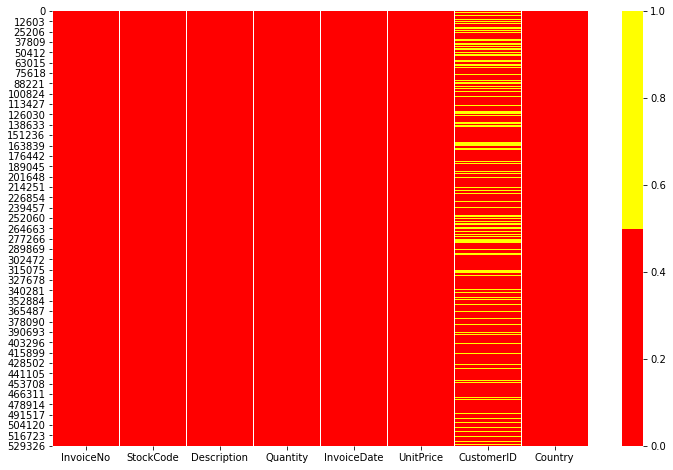

In [8]:
# using a heatmap to find out missing values, if any
cols = df.columns[:]
colours = ['#ff0000', '#ffff00'] # in order from left to right, red - not missing, yellow - missing
ax = plt.subplots(figsize = (12, 8))
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

In [9]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [10]:
# drop null values
df1 = df.dropna()

df1.isnull().sum().sort_values(ascending = False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
# change the CustomerID to integer type
df1['CustomerID'] = df1['CustomerID'].astype('int64')

# removing commas and extra spaces in the description
df1['Description'] = df1.Description.str.strip(',')
df1['Description'] = df1.Description.str.strip()

df1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
df1.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [14]:
# removing the negative quantities
df1 = df1[df1.Quantity > 0]

# remove duplicate values
df1 = df1.drop_duplicates()

df1.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,392732.00,392732.00,392732.00
mean,13.15,3.13,15287.73
std,181.59,22.24,1713.57
min,1.00,0.00,12346.00
25%,2.00,1.25,13955.00
50%,6.00,1.95,15150.00
75%,12.00,3.75,16791.00
max,80995.00,8142.75,18287.00


In [15]:
# add a new column which corresponds to the total amount spent per order
df1['OrderAmount'] = df1['Quantity'] * df1['UnitPrice']

# rearrange the data columns
df1 = df1[['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'OrderAmount', 'CustomerID', 'Country']]

df1.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,OrderAmount,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


# Exploratory Data Analysis

### No. of orders made by customers

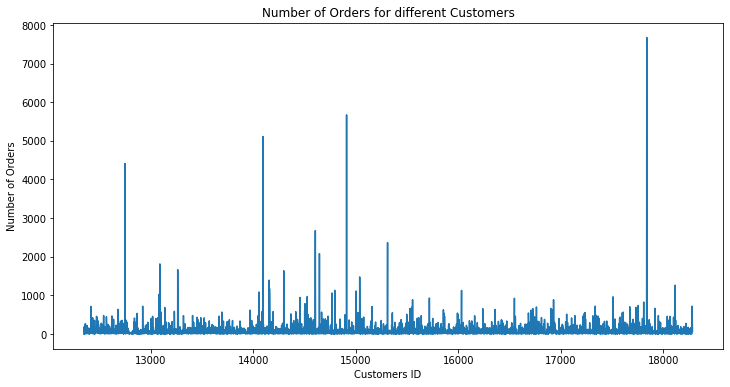

In [16]:
orders = df1.groupby(by = ['CustomerID','Country'], as_index = False)['InvoiceNo'].count()

plt.subplots(figsize = (12,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Money spent by customers

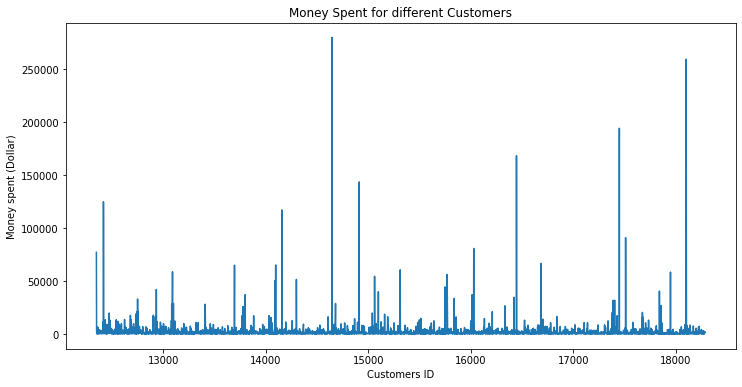

In [17]:
money_spent = df1.groupby(by = ['CustomerID','Country'], as_index = False)['OrderAmount'].sum()

plt.subplots(figsize = (12,6))
plt.plot(money_spent.CustomerID, money_spent.OrderAmount)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Top selling products

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  after removing the cwd from sys.path.


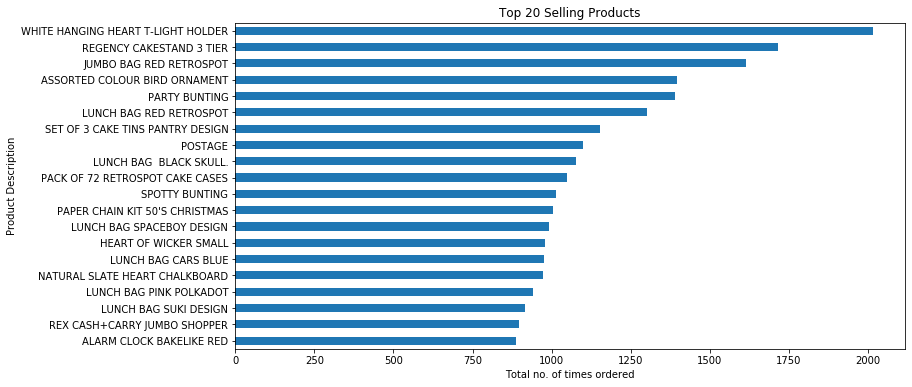

In [18]:
prod_count = df1.groupby('Description')['InvoiceNo'].count().sort_values().tail(20)

plt.subplots(figsize = (12,6))
prod_count.plot('barh')
plt.xlabel('Total no. of times ordered')
plt.ylabel('Product Description')
plt.title('Top 20 Selling Products')
plt.show()

### Orders based on country

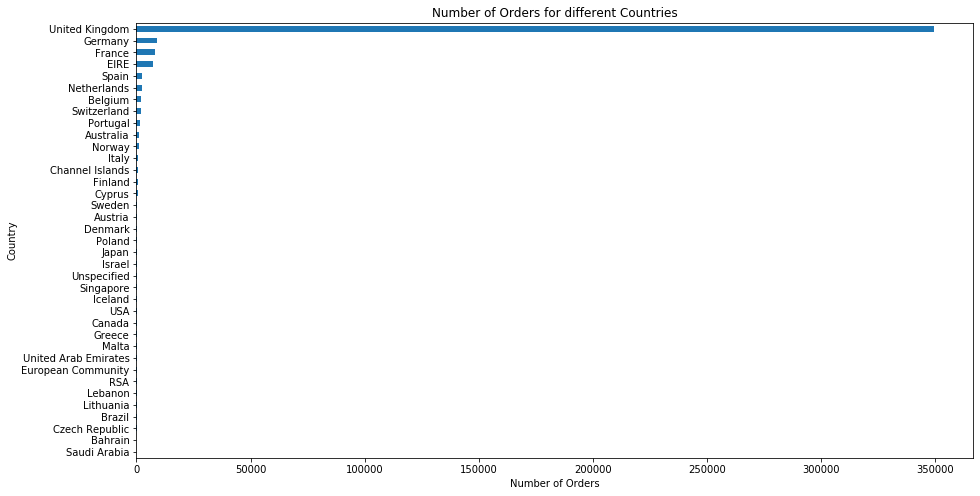

In [19]:
country_count = df1.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize = (15,8))
country_count.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries')
plt.show()

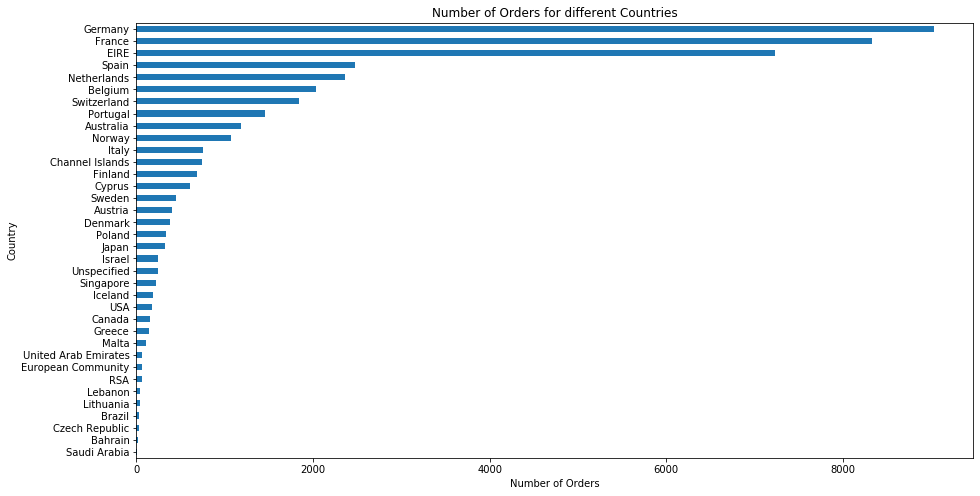

In [20]:
del country_count['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize = (15,8))
country_count.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries')
plt.show()

### Money spent by different countries

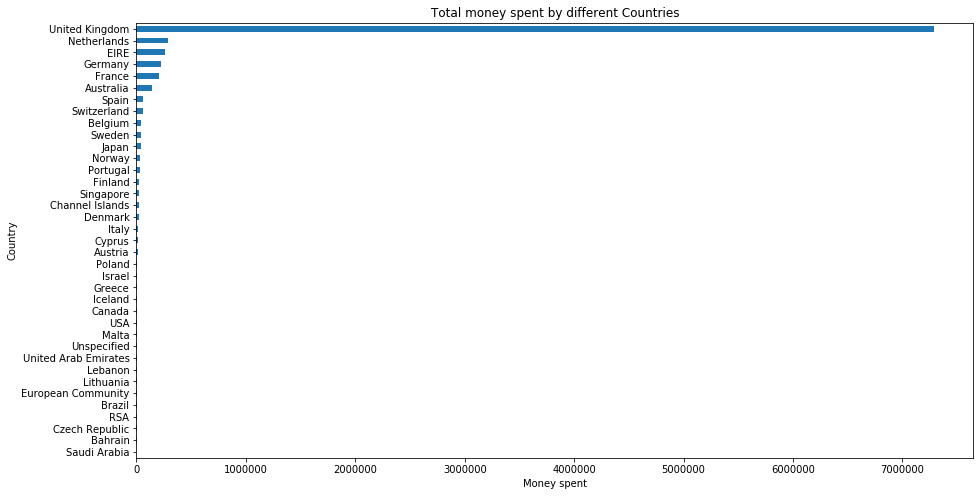

In [21]:
country_amount = df1.groupby('Country')['OrderAmount'].sum().sort_values()

# plot number of total money spent by each country (with UK)
plt.subplots(figsize = (15,8))
country_amount.plot(kind = 'barh')
plt.xlabel('Money spent')
plt.ylabel('Country')
plt.title('Total money spent by different Countries')
plt.show()

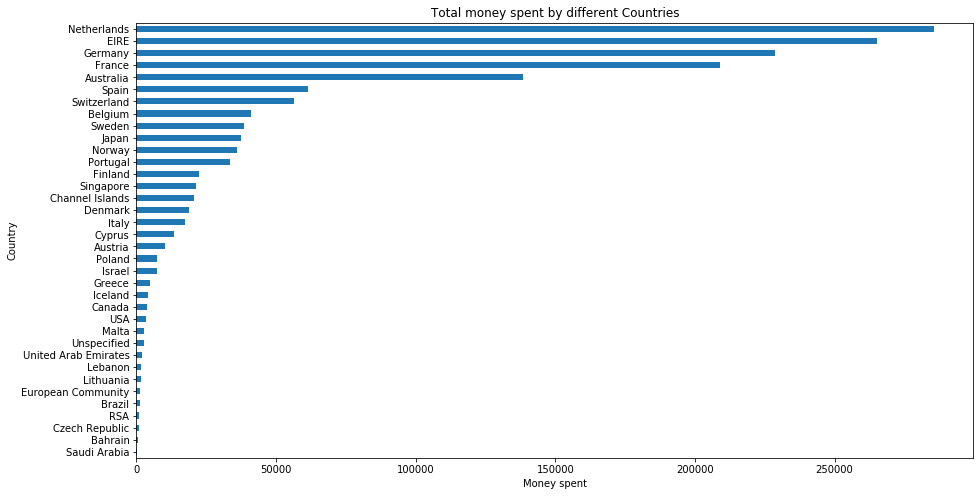

In [22]:
del country_amount['United Kingdom']


# plot number of total money spent by each country (without UK)
plt.subplots(figsize = (15,8))
country_amount.plot(kind = 'barh')
plt.xlabel('Money spent')
plt.ylabel('Country')
plt.title('Total money spent by different Countries')
plt.show()

# Generalised Sequential Pattern (GSP)

In [23]:
df1.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,OrderAmount,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [24]:
# remove unwanted columns
df_final = df1.drop(columns = ['InvoiceDate', 'UnitPrice', 'OrderAmount', 'CustomerID', 'Country'])
df_final.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [25]:
# convert InvoiceNo to a string type
df_final['InvoiceNo'] = df_final['InvoiceNo'].astype('str')

# Remove cancelled orders
df_final = df_final[ ~ df_final['InvoiceNo'].str.contains('C')]

# drop rows without InvoiceNo
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [26]:
# create basket
basket = (df_final
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [27]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# to convert all positive values to 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace = True, axis = 1)

In [29]:
basket_index = basket.index
basket_column = basket.columns

In [30]:
# converting the basket into a dataset
dataset = []

for i in basket_index:
    itemset = []
    for c in basket_column:
        if basket.get_value(i, c) != 0:
            itemset.append(c)
    dataset.append(itemset)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [31]:
dataset

[['CREAM CUPID HEARTS COAT HANGER',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN'],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'DOORMAT NEW ENGLAND',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'HOME BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY',
  'LOVE BUILDING BLOCK WORD',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART'],
 ['BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE GREEN',
  'ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  

In [32]:
# create 1-candidate sets
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
                
    C1.sort()
    return list(map(frozenset, C1))

In [33]:
# Generate L1 from C1
def scanD(dataSet, Ck, minSupport):
    ssCnt = {}
    for tid in dataSet:
        for can in Ck:
            if can.issubset(tid):
                if not can in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(dataSet))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

In [34]:
C1 = createC1(dataset)
C1

[frozenset({'10 COLOUR SPACEBOY PEN'}),
 frozenset({'12 COLOURED PARTY BALLOONS'}),
 frozenset({'12 DAISY PEGS IN WOOD BOX'}),
 frozenset({'12 EGG HOUSE PAINTED WOOD'}),
 frozenset({'12 HANGING EGGS HAND PAINTED'}),
 frozenset({'12 IVORY ROSE PEG PLACE SETTINGS'}),
 frozenset({'12 MESSAGE CARDS WITH ENVELOPES'}),
 frozenset({'12 PENCIL SMALL TUBE WOODLAND'}),
 frozenset({'12 PENCILS SMALL TUBE RED RETROSPOT'}),
 frozenset({'12 PENCILS SMALL TUBE SKULL'}),
 frozenset({'12 PENCILS TALL TUBE POSY'}),
 frozenset({'12 PENCILS TALL TUBE RED RETROSPOT'}),
 frozenset({'12 PENCILS TALL TUBE SKULLS'}),
 frozenset({'12 PENCILS TALL TUBE WOODLAND'}),
 frozenset({'12 PINK HEN+CHICKS IN BASKET'}),
 frozenset({'12 PINK ROSE PEG PLACE SETTINGS'}),
 frozenset({'12 RED ROSE PEG PLACE SETTINGS'}),
 frozenset({'15 PINK FLUFFY CHICKS IN BOX'}),
 frozenset({'15CM CHRISTMAS GLASS BALL 20 LIGHTS'}),
 frozenset({'16 PC CUTLERY SET PANTRY DESIGN'}),
 frozenset({'16 PIECE CUTLERY SET PANTRY DESIGN'}),
 frozenset

In [35]:
# convert the dataset to a list
D = list(map(set, dataset))

In [36]:
L1, suppDat0 = scanD(D, C1, 0.01)
L1

[frozenset({'JUMBO BAG PAISLEY PARK'}),
 frozenset({'LUNCH BAG PAISLEY PARK'}),
 frozenset({'VINTAGE DOILY JUMBO BAG RED'}),
 frozenset({'TRADITIONAL NAUGHTS & CROSSES'}),
 frozenset({'TRADITIONAL PICK UP STICKS GAME'}),
 frozenset({'VINTAGE DOILY TRAVEL SEWING KIT'}),
 frozenset({'SET 12 COLOUR PENCILS SPACEBOY'}),
 frozenset({'PLAYING CARDS JUBILEE UNION JACK'}),
 frozenset({'PLAYING CARDS KEEP CALM & CARRY ON'}),
 frozenset({'SPACEBOY MINI BACKPACK'}),
 frozenset({'HOME SWEET HOME CUSHION COVER'}),
 frozenset({'3 DRAWER ANTIQUE WHITE WOOD CABINET'}),
 frozenset({'HAND WARMER RED LOVE HEART'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'LOVE HOT WATER BOTTLE'}),
 frozenset({'SET 6 SCHOOL MILK BOTTLES IN CRATE'}),
 frozenset({'IVORY WICKER HEART MEDIUM'}),
 frozenset({'DECORATIVE WICKER HEART MEDIUM'}),
 frozenset({'IVORY WICKER HEART LARGE'}),
 frozenset({'DECORATIVE WICKER HEART LARGE'}),
 frozenset({'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'JUMBO BAG VINTAGE DOILY'}),

In [37]:
# creates K-candidate set
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: #if first k-2 elements are equal
                retList.append(Lk[i] | Lk[j]) #set union
    return retList

In [38]:
def apriori(dataSet, minSupport = 0.01):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)#scan DB to get Lk
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [39]:
L, suppData = apriori(dataset)

In [40]:
L

[[frozenset({'JUMBO BAG PAISLEY PARK'}),
  frozenset({'LUNCH BAG PAISLEY PARK'}),
  frozenset({'VINTAGE DOILY JUMBO BAG RED'}),
  frozenset({'TRADITIONAL NAUGHTS & CROSSES'}),
  frozenset({'TRADITIONAL PICK UP STICKS GAME'}),
  frozenset({'VINTAGE DOILY TRAVEL SEWING KIT'}),
  frozenset({'SET 12 COLOUR PENCILS SPACEBOY'}),
  frozenset({'PLAYING CARDS JUBILEE UNION JACK'}),
  frozenset({'PLAYING CARDS KEEP CALM & CARRY ON'}),
  frozenset({'SPACEBOY MINI BACKPACK'}),
  frozenset({'HOME SWEET HOME CUSHION COVER'}),
  frozenset({'3 DRAWER ANTIQUE WHITE WOOD CABINET'}),
  frozenset({'HAND WARMER RED LOVE HEART'}),
  frozenset({'HOT WATER BOTTLE KEEP CALM'}),
  frozenset({'LOVE HOT WATER BOTTLE'}),
  frozenset({'SET 6 SCHOOL MILK BOTTLES IN CRATE'}),
  frozenset({'IVORY WICKER HEART MEDIUM'}),
  frozenset({'DECORATIVE WICKER HEART MEDIUM'}),
  frozenset({'IVORY WICKER HEART LARGE'}),
  frozenset({'DECORATIVE WICKER HEART LARGE'}),
  frozenset({'LUNCH BAG VINTAGE DOILY'}),
  frozenset({'JUMBO

In [41]:
# 1-frequent itemsets
L[0]

[frozenset({'JUMBO BAG PAISLEY PARK'}),
 frozenset({'LUNCH BAG PAISLEY PARK'}),
 frozenset({'VINTAGE DOILY JUMBO BAG RED'}),
 frozenset({'TRADITIONAL NAUGHTS & CROSSES'}),
 frozenset({'TRADITIONAL PICK UP STICKS GAME'}),
 frozenset({'VINTAGE DOILY TRAVEL SEWING KIT'}),
 frozenset({'SET 12 COLOUR PENCILS SPACEBOY'}),
 frozenset({'PLAYING CARDS JUBILEE UNION JACK'}),
 frozenset({'PLAYING CARDS KEEP CALM & CARRY ON'}),
 frozenset({'SPACEBOY MINI BACKPACK'}),
 frozenset({'HOME SWEET HOME CUSHION COVER'}),
 frozenset({'3 DRAWER ANTIQUE WHITE WOOD CABINET'}),
 frozenset({'HAND WARMER RED LOVE HEART'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'LOVE HOT WATER BOTTLE'}),
 frozenset({'SET 6 SCHOOL MILK BOTTLES IN CRATE'}),
 frozenset({'IVORY WICKER HEART MEDIUM'}),
 frozenset({'DECORATIVE WICKER HEART MEDIUM'}),
 frozenset({'IVORY WICKER HEART LARGE'}),
 frozenset({'DECORATIVE WICKER HEART LARGE'}),
 frozenset({'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'JUMBO BAG VINTAGE DOILY'}),

In [42]:
# 2-frequent itemsets
L[1]

[frozenset({'HAND WARMER OWL DESIGN', 'HAND WARMER RED LOVE HEART'}),
 frozenset({'HOT WATER BOTTLE I AM SO POORLY', 'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM', 'LOVE HOT WATER BOTTLE'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM',
            'HOT WATER BOTTLE TEA AND SYMPATHY'}),
 frozenset({'CHOCOLATE HOT WATER BOTTLE', 'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'JUMBO BAG RED RETROSPOT', 'JUMBO BAG VINTAGE DOILY'}),
 frozenset({'JUMBO BAG VINTAGE DOILY', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'LUNCH BAG SPACEBOY DESIGN', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'LUNCH BAG SUKI DESIGN', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'JUMBO BAG VINTAGE DOILY', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'SET OF 12 FAIRY CAKE BAKING CASES',
            'SET OF 12 MINI LOAF BAKING CASES'}),
 frozenset({'SET OF 12 FAIRY CAKE BAKING 

In [43]:
# 3-frequent itemsets
L[2]

[frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG SUKI DESIGN'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG WOODLAND'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG SUKI DESIGN'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG SPACEBOY DESIGN'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG SPACEBOY DESIGN',
            'LUNCH BAG SUKI DESIGN'}),
 frozenset({'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG SUKI DESIGN',
            'LUNCH BAG WOODLAND'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG PINK P

In [44]:
# 4-frequent itemsets
L[3]

[frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG CARS BLUE',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'})]

# Results

In [45]:
print("Few of the 1-frequent itemsets are:")
L[0][:5]

Few of the 1-frequent itemsets are:


[frozenset({'JUMBO BAG PAISLEY PARK'}),
 frozenset({'LUNCH BAG PAISLEY PARK'}),
 frozenset({'VINTAGE DOILY JUMBO BAG RED'}),
 frozenset({'TRADITIONAL NAUGHTS & CROSSES'}),
 frozenset({'TRADITIONAL PICK UP STICKS GAME'})]

In [46]:
print("Few of the 2-frequent itemsets are:")
L[1][:5]

Few of the 2-frequent itemsets are:


[frozenset({'HAND WARMER OWL DESIGN', 'HAND WARMER RED LOVE HEART'}),
 frozenset({'HOT WATER BOTTLE I AM SO POORLY', 'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM', 'LOVE HOT WATER BOTTLE'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM',
            'HOT WATER BOTTLE TEA AND SYMPATHY'}),
 frozenset({'CHOCOLATE HOT WATER BOTTLE', 'HOT WATER BOTTLE KEEP CALM'})]

In [47]:
print("Few of the 3-frequent itemsets are:")
L[2][:5]

Few of the 3-frequent itemsets are:


[frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG SUKI DESIGN'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG WOODLAND'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'LUNCH BAG APPLE DESIGN',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG SUKI DESIGN'})]

In [48]:
print("The 4-frequent itemsets are:")
L[3][:5]

The 4-frequent itemsets are:


[frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG CARS BLUE',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'})]